In [1]:
import pandas as pd
import numpy as np

## DSD Computation

In [203]:
! ls outputs/node2vec/


fission_yeast_biogrid_d_100_p_1_q_1_nw_10
logs
mouse_12000_biogrid_d_100_p_1_q_1_nw_10


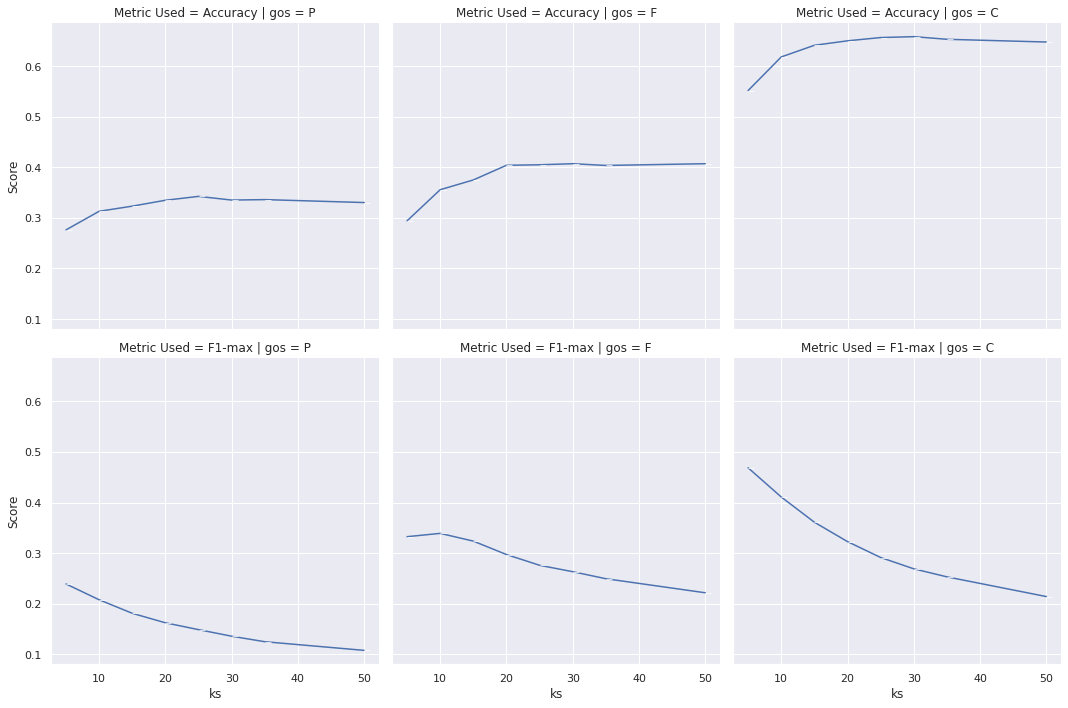

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "darkgrid")

kdsd = [5, 10, 15, 20, 25, 30, 35, 50]
def generate_dsd_table_results(kvals, gos, folder):
    """
    Generating DSD results for different kvals
    """
    results = {"gos": [],
              "ks": [],
              "Score": [],
              "Metric Used": [],
              "std": []}
    for g in gos:
        for k in kvals:
            df = pd.read_csv(f"{folder}/{g}_k_{k}.tsv", sep = "\t")
            
            results["gos"].append(g)
            results["ks"].append(k)
            results["Metric Used"].append("Accuracy")
            results["Score"].append(df["acc"].mean())
            results["std"].append(df["acc"].std())            
            results["gos"].append(g)
            results["ks"].append(k)
            results["Metric Used"].append("F1-max")
            results["Score"].append(df["f1"].mean())
            results["std"].append(df["f1"].std())
    df = pd.DataFrame(results)
    return df
#dsd_df = generate_dsd_table_results(kdsd, ["P", "F", "C"], "outputs/dsd/fission_yeast_biogrid/")
#p = sns.relplot(data = dsd_df, x="ks", y = "Score", row="Metric Used", col="gos", kind = "line", marker = True)
# SAVE the figure
# p.savefig("outputs/dsd/fission_yeast_biogrid/variation_with_k.png")

## Finding the MAX terms
### DSD

In [232]:
max_map = {"org": [], "method": [], "go": [], "metric": [], "best": []}
# DSD
for org in ["fission_yeast_biogrid", "mouse_12000_biogrid"]:
    dsd_org = generate_dsd_table_results(kdsd, ["P", "F", "C"], f"outputs/dsd/{org}/")
    res = dsd_fission.groupby(["Metric Used", "gos"]).agg("max")
    for i, r in res.iterrows():
        max_map["org"].append(org)
        max_map["metric"].append(i[0])
        max_map["go"].append(i[1])
        max_map["best"].append(r["Score"])
        max_map["method"].append("dsd")

max_map

{'org': ['fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid'],
 'method': ['dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd'],
 'go': ['C', 'F', 'P', 'C', 'F', 'P', 'C', 'F', 'P', 'C', 'F', 'P'],
 'metric': ['Accuracy',
  'Accuracy',
  'Accuracy',
  'F1-max',
  'F1-max',
  'F1-max',
  'Accuracy',
  'Accuracy',
  'Accuracy',
  'F1-max',
  'F1-max',
  'F1-max'],
 'best': [0.6932203389830509,
  0.5299849501313675,
  0.5099977720842153,
  0.5058166230784495,
  0.37465687936906866,
  0.41960878464474344,
  0.6932203389830509,
  0.5299849501313675,
  0.5099977720842153,
  0.5058166230784495,
  0.37465687936906866,
  0.41960878464474344]}

### MASHUP

In [233]:
for org in ["fission_yeast_biogrid.mashup.dim_1000", "mouse_12000_biogrid.mashup.dim_1000"]:
        for go in ["F", "P", "C"]:
            dfmash = pd.read_csv(f"outputs/mashup/{org}/{go}.tsv", sep = "\t")
            for metric in ["acc", "f1"]:
                max_map["method"].append("mashup")
                max_map["org"].append("fission_yeast_biogrid" if org.startswith("fission") else "mouse_12000_biogrid")
                max_map["metric"].append("Accuracy" if metric == "acc" else "F1-max")
                max_map["go"].append(go)
                max_map["best"].append(dfmash[metric].mean())
max_map

{'org': ['fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid'],
 'method': ['dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup'],
 'go': ['C',
  'F',
  'P',
  'C',
  'F',
  'P',
  'C',
  'F',
  'P',
  'C',
  'F',
  'P',
  'F',
  'F',
 

### NODE2VEC

In [234]:
for org in ["fission_yeast_biogrid_d_100_p_1_q_1_nw_10", "mouse_12000_biogrid_d_100_p_1_q_1_nw_10"]:
        for go in ["F", "P", "C"]:
            dfmash = pd.read_csv(f"outputs/node2vec/{org}/{go}.tsv", sep = "\t")
            for metric in ["acc", "f1"]:
                max_map["method"].append("node2vec")
                max_map["org"].append("fission_yeast_biogrid" if org.startswith("fission") else "mouse_12000_biogrid")
                max_map["metric"].append("Accuracy" if metric == "acc" else "F1-max")
                max_map["go"].append(go)
                max_map["best"].append(dfmash[metric].mean())
max_map
df_mmap = pd.DataFrame(max_map)
df_mmap

,org,method,go,metric,best
0,fission_yeast_biogrid,dsd,C,Accuracy,0.693220
1,fission_yeast_biogrid,dsd,F,Accuracy,0.529985
2,fission_yeast_biogrid,dsd,P,Accuracy,0.509998
3,fission_yeast_biogrid,dsd,C,F1-max,0.505817
4,fission_yeast_biogrid,dsd,F,F1-max,0.374657
5,fission_yeast_biogrid,dsd,P,F1-max,0.419609
6,mouse_12000_biogrid,dsd,C,Accuracy,0.693220
7,mouse_12000_biogrid,dsd,F,Accuracy,0.529985
8,mouse_12000_biogrid,dsd,P,Accuracy,0.509998
9,mouse_12000_biogrid,dsd,C,F1-max,0.505817


In [235]:
ks = [5, 10, 15, 20, 25, 30, 35]
alphas = ["0.05", "0.1", "0.2", "0.4", "0.6", "0.8", "1.0"]
falphas = [float(a) for a in alphas]

def generate_table_results(kvals, alphas, gos, folder):
    """
    Generating the table from alphas and kvals
    """
    results = {"gos": [], 
               "ks": [], 
               "alphas": [], 
               "mean_acc": [], 
               "std_acc": [], 
               "mean_f1": [], 
               "std_f1": []}
    for go in gos:
        print(f"\tGO: {go}")
        for k in ks:
            print(f"\t\t K: {k}")
            for a in alphas:
                results["gos"].append(go)
                results["ks"].append(k)
                results["alphas"].append(a)
                
                df = pd.read_csv(f"{folder}/{go}_k_{k}_alpha_{a}.tsv", sep = "\t")
                
                results["mean_acc"].append(df["acc"].mean())
                results["mean_f1"].append(df["f1"].mean())
                results["std_acc"].append(df["acc"].std())
                results["std_f1"].append(df["f1"].std())
                print(f"\t\t\t ALPHA: {a}, Accuracy: {df['acc'].mean()} +- {df['acc'].std()}"
                      + f"\t\t\t                   F1: {df['f1'].mean()} +- {df['f1'].std()}")
    df = pd.DataFrame(results)
    return df
                
        

### UNIMUNDO - MOUSE - HUMAN

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "darkgrid")

df_hm = generate_table_results(ks, alphas, ["P", "F", "C"], "outputs/unimundo_outputs/human_12000_biogrid-mouse_12000_biogrid/")
df_hm_acc = df_hm.drop(["mean_f1", "std_f1"], axis = 1)
df_hm_f1  = df_hm.drop(["mean_acc", "std_acc"], axis = 1)

df_hm_acc = df_hm_acc.rename(columns = {"mean_acc": "Score", "std_acc":"std"})
df_hm_f1 = df_hm_f1.rename(columns = {"mean_f1": "Score", "std_f1": "std"})
df_hm_acc["Metric Used"] = "Accuracy"
df_hm_f1["Metric Used"]  = "F1-max"

df_comp_hm = pd.concat([df_hm_acc, df_hm_f1]).reset_index()
df_comp_hm["std"] = df_comp_hm["std"] 
df_comp_hm["alphas"] = df_comp_hm["alphas"].astype(float)

	GO: P
		 K: 5
			 ALPHA: 0.05, Accuracy: 0.2209931813940738 +- 0.008907498389361697			                   F1: 0.22274990427201397 +- 0.011180374052016356
			 ALPHA: 0.1, Accuracy: 0.2119014315934796 +- 0.01714856957150584			                   F1: 0.2214191690745242 +- 0.0033617380337084635
			 ALPHA: 0.2, Accuracy: 0.21862838515132546 +- 0.007770063205216703			                   F1: 0.2144562011200002 +- 0.008485884975323094
			 ALPHA: 0.4, Accuracy: 0.20952375447734198 +- 0.014459400244845906			                   F1: 0.21289905323280078 +- 0.009227305025057305
			 ALPHA: 0.6, Accuracy: 0.1849787548158778 +- 0.012659002626951054			                   F1: 0.17843942338016655 +- 0.00700385593707181
			 ALPHA: 0.8, Accuracy: 0.1784223902607386 +- 0.013758231537861767			                   F1: 0.1808001169365552 +- 0.0014616810205027935
			 ALPHA: 1.0, Accuracy: 0.17405280167253184 +- 0.013787731030587018			                   F1: 0.11952975555911756 +- 0.0016004637220198169
		 K: 10
			 ALPH

			 ALPHA: 0.6, Accuracy: 0.6359850232220674 +- 0.014964919735917641			                   F1: 0.2908599574146934 +- 0.004831629120860631
			 ALPHA: 0.8, Accuracy: 0.6268491438962016 +- 0.014632923433854896			                   F1: 0.2910928006920721 +- 0.003646315862725887
			 ALPHA: 1.0, Accuracy: 0.6183227038816906 +- 0.010365415867306143			                   F1: 0.19679682540725257 +- 0.004399765425985937
		 K: 30
			 ALPHA: 0.05, Accuracy: 0.6419706958558574 +- 0.019464823850716653			                   F1: 0.4119483528230625 +- 0.019153865682570943
			 ALPHA: 0.1, Accuracy: 0.6416696151451772 +- 0.012125407169185925			                   F1: 0.40948339536340017 +- 0.01025315436450975
			 ALPHA: 0.2, Accuracy: 0.6512523569166827 +- 0.014237713313765171			                   F1: 0.37250904546205055 +- 0.0062860757372208784
			 ALPHA: 0.4, Accuracy: 0.6437650876257955 +- 0.018932130515028216			                   F1: 0.32749137487615665 +- 0.00875190111940981
			 ALPHA: 0.6, Accuracy: 0.

In [237]:
df_mmap["id"] = df_mmap["org"] + "-" + df_mmap["method"] + "-" + df_mmap["go"] + "-" + df_mmap["metric"]
df_mmap       = df_mmap.set_index("id")
df_mmap

,org,method,go,metric,best
id,,,,,
fission_yeast_biogrid-dsd-C-Accuracy,fission_yeast_biogrid,dsd,C,Accuracy,0.693220
fission_yeast_biogrid-dsd-F-Accuracy,fission_yeast_biogrid,dsd,F,Accuracy,0.529985
fission_yeast_biogrid-dsd-P-Accuracy,fission_yeast_biogrid,dsd,P,Accuracy,0.509998
fission_yeast_biogrid-dsd-C-F1-max,fission_yeast_biogrid,dsd,C,F1-max,0.505817
fission_yeast_biogrid-dsd-F-F1-max,fission_yeast_biogrid,dsd,F,F1-max,0.374657
fission_yeast_biogrid-dsd-P-F1-max,fission_yeast_biogrid,dsd,P,F1-max,0.419609
mouse_12000_biogrid-dsd-C-Accuracy,mouse_12000_biogrid,dsd,C,Accuracy,0.693220
mouse_12000_biogrid-dsd-F-Accuracy,mouse_12000_biogrid,dsd,F,Accuracy,0.529985
mouse_12000_biogrid-dsd-P-Accuracy,mouse_12000_biogrid,dsd,P,Accuracy,0.509998


[0.1929677 0.1929677 0.1929677 0.1929677 0.1929677 0.1929677 0.1929677]
[0.21825293 0.21825293 0.21825293 0.21825293 0.21825293 0.21825293
 0.21825293]
[0.35069845 0.35069845 0.35069845 0.35069845 0.35069845 0.35069845
 0.35069845]
[0.19407207 0.19407207 0.19407207 0.19407207 0.19407207 0.19407207
 0.19407207]
[0.23227287 0.23227287 0.23227287 0.23227287 0.23227287 0.23227287
 0.23227287]
[0.32959253 0.32959253 0.32959253 0.32959253 0.32959253 0.32959253
 0.32959253]


'\nfor i, k in enumerate(ks):\n    for j, g in enumerate(["P", "F", "C"]):\n        dc = df_comp.loc[(df_comp["ks"] == k) & (df_comp["gos"] == g), :]\n        dc_a = dc[dc["Metric Used"] == "Accuracy"]\n        dc_f = dc[dc["Metric Used"] == "F1-max"]\n        p.axes[i, j].fill_between(dc_a["alphas"], dc_a["Score"] - dc_a["std"], dc_a["Score"] + dc_a["std"], color = "blue", alpha=0.15)\n        p.axes[i, j].fill_between(dc_f["alphas"], dc_f["Score"] - dc_f["std"], dc_f["Score"] + dc_f["std"], color = "orange", alpha=0.15)\np.savefig("outputs/unimundo_outputs/bakers_yeast_biogrid-fission_yeast_biogrid/alphas_x_axis.png")\n'

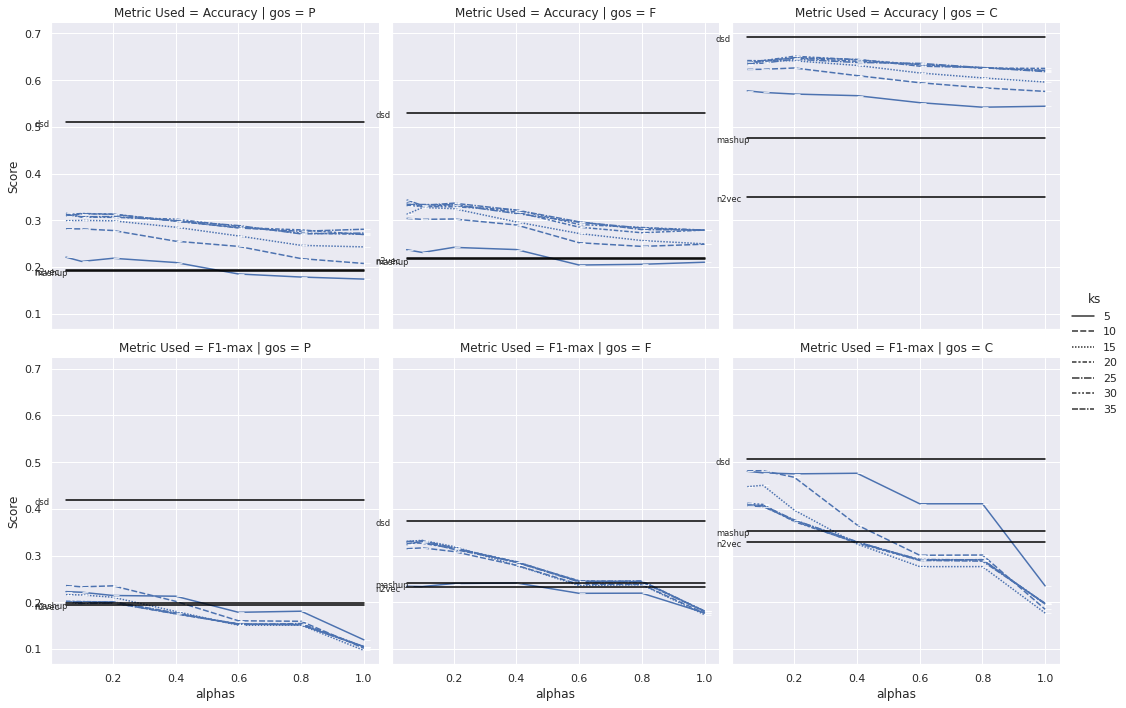

In [295]:
## SEEING THE VARIATION with VARIATION in "alphas"
p = sns.relplot(data = df_comp_hm, x= "alphas", y="Score", col="gos", row="Metric Used",
                style = "ks", kind = "line", marker = True)
for i, k in enumerate(["Accuracy", "F1-max"]):
    for j, g in enumerate(["P", "F", "C"]):
        n2vec  = df_mmap.loc[f"mouse_12000_biogrid-node2vec-{g}-{k}"]["best"]
        dsd    = df_mmap.loc[f"mouse_12000_biogrid-dsd-{g}-{k}"]["best"]
        mashup = df_mmap.loc[f"mouse_12000_biogrid-mashup-{g}-{k}"]["best"]
        print(n2vec * np.ones((len(falphas))))
        p.axes[i, j].plot(falphas, n2vec * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("n2vec", xy=(1,0.2), xytext=(-0.05,n2vec-0.01), fontsize = "x-small")
        p.axes[i, j].plot(falphas, dsd * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("dsd", xy=(1,0.2), xytext=(-0.05,dsd-0.01), fontsize = "x-small")
        p.axes[i, j].plot(falphas, mashup * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("mashup", xy=(1,0.2), xytext=(-0.05,mashup-0.01), fontsize = "x-small")
        
p.savefig("outputs/unimundo/human_12000_biogrid-mouse_12000_biogrid/mouse_vs_alpha.png")
#p.map(sns.lineplot, ci = None)
"""
for i, k in enumerate(ks):
    for j, g in enumerate(["P", "F", "C"]):
        dc = df_comp.loc[(df_comp["ks"] == k) & (df_comp["gos"] == g), :]
        dc_a = dc[dc["Metric Used"] == "Accuracy"]
        dc_f = dc[dc["Metric Used"] == "F1-max"]
        p.axes[i, j].fill_between(dc_a["alphas"], dc_a["Score"] - dc_a["std"], dc_a["Score"] + dc_a["std"], color = "blue", alpha=0.15)
        p.axes[i, j].fill_between(dc_f["alphas"], dc_f["Score"] - dc_f["std"], dc_f["Score"] + dc_f["std"], color = "orange", alpha=0.15)
p.savefig("outputs/unimundo_outputs/bakers_yeast_biogrid-fission_yeast_biogrid/alphas_x_axis.png")
"""


[0.1929677 0.1929677 0.1929677 0.1929677 0.1929677 0.1929677 0.1929677]
[0.21825293 0.21825293 0.21825293 0.21825293 0.21825293 0.21825293
 0.21825293]
[0.35069845 0.35069845 0.35069845 0.35069845 0.35069845 0.35069845
 0.35069845]
[0.19407207 0.19407207 0.19407207 0.19407207 0.19407207 0.19407207
 0.19407207]
[0.23227287 0.23227287 0.23227287 0.23227287 0.23227287 0.23227287
 0.23227287]
[0.32959253 0.32959253 0.32959253 0.32959253 0.32959253 0.32959253
 0.32959253]


'\nfor i, k in enumerate(ks):\n    for j, g in enumerate(["P", "F", "C"]):\n        dc = df_comp.loc[(df_comp["ks"] == k) & (df_comp["gos"] == g), :]\n        dc_a = dc[dc["Metric Used"] == "Accuracy"]\n        dc_f = dc[dc["Metric Used"] == "F1-max"]\n        p.axes[i, j].fill_between(dc_a["alphas"], dc_a["Score"] - dc_a["std"], dc_a["Score"] + dc_a["std"], color = "blue", alpha=0.15)\n        p.axes[i, j].fill_between(dc_f["alphas"], dc_f["Score"] - dc_f["std"], dc_f["Score"] + dc_f["std"], color = "orange", alpha=0.15)\np.savefig("outputs/unimundo_outputs/bakers_yeast_biogrid-fission_yeast_biogrid/alphas_x_axis.png")\n'

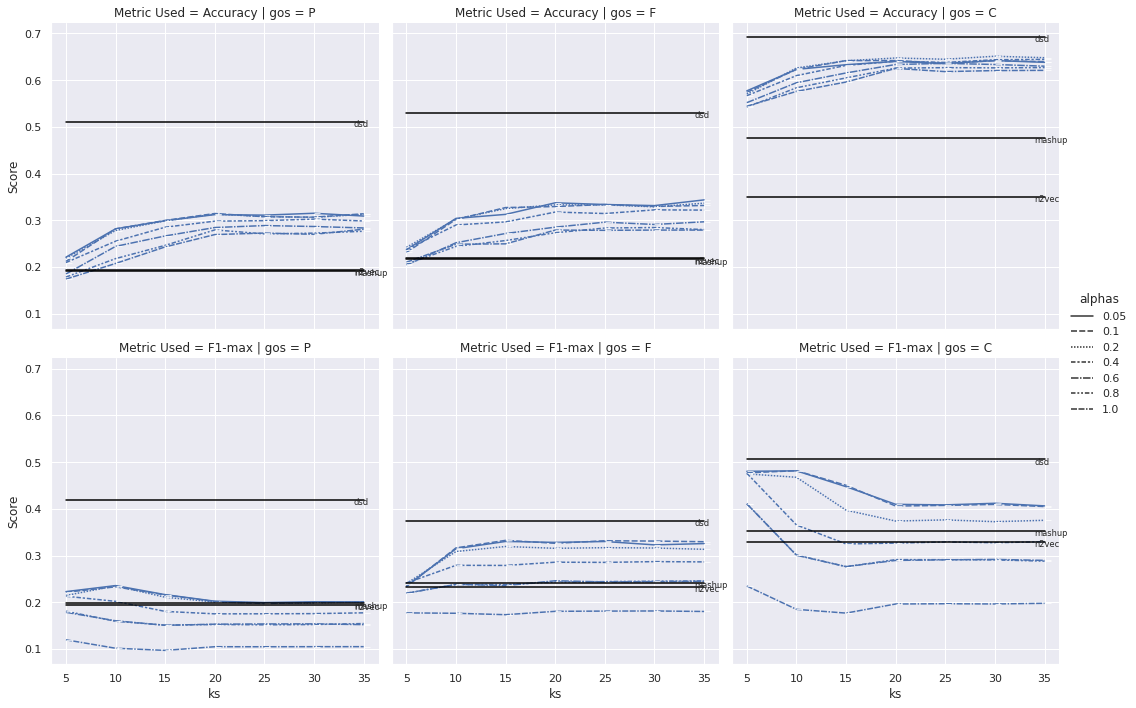

In [290]:
## SEEING THE VARIATION with VARIATION in "alphas"
p = sns.relplot(data = df_comp_hm, x= "ks", y="Score", col="gos", row="Metric Used",
                style = "alphas", kind = "line", marker = True)
for i, k in enumerate(["Accuracy", "F1-max"]):
    for j, g in enumerate(["P", "F", "C"]):
        n2vec  = df_mmap.loc[f"mouse_12000_biogrid-node2vec-{g}-{k}"]["best"]
        dsd    = df_mmap.loc[f"mouse_12000_biogrid-dsd-{g}-{k}"]["best"]
        mashup = df_mmap.loc[f"mouse_12000_biogrid-mashup-{g}-{k}"]["best"]
        print(n2vec * np.ones((len(falphas))))
        p.axes[i, j].plot(ks, n2vec * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("n2vec", xycoords = "data", xy=(5, n2vec), xytext=(34,n2vec-0.01), fontsize = "x-small")
        p.axes[i, j].plot(ks, dsd * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("dsd", xycoords = "data", xy=(5, dsd), xytext=(34,dsd-0.01), fontsize = "x-small")
        p.axes[i, j].plot(ks, mashup * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("mashup", xycoords = "data", xy=(5, mashup), xytext=(34,mashup-0.01), fontsize = "x-small")
        
p.savefig("outputs/unimundo/human_12000_biogrid-mouse_12000_biogrid/mouse_vs_ks.png")
#p.map(sns.lineplot, ci = None)
"""
for i, k in enumerate(ks):
    for j, g in enumerate(["P", "F", "C"]):
        dc = df_comp.loc[(df_comp["ks"] == k) & (df_comp["gos"] == g), :]
        dc_a = dc[dc["Metric Used"] == "Accuracy"]
        dc_f = dc[dc["Metric Used"] == "F1-max"]
        p.axes[i, j].fill_between(dc_a["alphas"], dc_a["Score"] - dc_a["std"], dc_a["Score"] + dc_a["std"], color = "blue", alpha=0.15)
        p.axes[i, j].fill_between(dc_f["alphas"], dc_f["Score"] - dc_f["std"], dc_f["Score"] + dc_f["std"], color = "orange", alpha=0.15)
p.savefig("outputs/unimundo_outputs/bakers_yeast_biogrid-fission_yeast_biogrid/alphas_x_axis.png")
"""

### UNIMUNDO - FISSION-YEAST BAKERS-YEAST

In [292]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "darkgrid")

df_bf = generate_table_results(ks, alphas, ["P", "F", "C"], "outputs/unimundo/bakers_yeast_biogrid-fission_yeast_biogrid/")
df_bf_acc = df_bf.drop(["mean_f1", "std_f1"], axis = 1)
df_bf_f1  = df_bf.drop(["mean_acc", "std_acc"], axis = 1)

df_bf_acc = df_bf_acc.rename(columns = {"mean_acc": "Score", "std_acc":"std"})
df_bf_f1 = df_bf_f1.rename(columns = {"mean_f1": "Score", "std_f1": "std"})
df_bf_acc["Metric Used"] = "Accuracy"
df_bf_f1["Metric Used"]  = "F1-max"

df_comp_bf = pd.concat([df_bf_acc, df_bf_f1]).reset_index()
df_comp_bf["std"] = df_comp_bf["std"] 
df_comp_bf["alphas"] = df_comp_bf["alphas"].astype(float)

	GO: P
		 K: 5
			 ALPHA: 0.05, Accuracy: 0.28739556644758824 +- 0.024041549586507137			                   F1: 0.3398513028325479 +- 0.043294813101880145
			 ALPHA: 0.1, Accuracy: 0.28742898518436 +- 0.040240283389596274			                   F1: 0.32636194265569884 +- 0.015536699224860052
			 ALPHA: 0.2, Accuracy: 0.2788849281497159 +- 0.030019120376902898			                   F1: 0.34479784093770316 +- 0.022524541890338402
			 ALPHA: 0.4, Accuracy: 0.29703687200623813 +- 0.04697123938957936			                   F1: 0.33991026813698155 +- 0.013716859559676093
			 ALPHA: 0.6, Accuracy: 0.28849281497159407 +- 0.01588059695858937			                   F1: 0.3108478955514359 +- 0.026411940628433675
			 ALPHA: 0.8, Accuracy: 0.28849281497159407 +- 0.035248552437536836			                   F1: 0.309711077032664 +- 0.026937488254939308
			 ALPHA: 1.0, Accuracy: 0.28739556644758824 +- 0.01054305019125544			                   F1: 0.28735152229038785 +- 0.012939841273950207
		 K: 10
			 ALPHA: 0.

			 ALPHA: 0.1, Accuracy: 0.5980225988700566 +- 0.08890791375294253			                   F1: 0.46972396349861995 +- 0.04009440192361291
			 ALPHA: 0.2, Accuracy: 0.635593220338983 +- 0.03893799082511359			                   F1: 0.4604550904289585 +- 0.009402229508816274
			 ALPHA: 0.4, Accuracy: 0.6587570621468927 +- 0.036403980120105234			                   F1: 0.4614663257153303 +- 0.029067159966292958
			 ALPHA: 0.6, Accuracy: 0.6700564971751414 +- 0.010311701835279094			                   F1: 0.4322808357934881 +- 0.023392363604976037
			 ALPHA: 0.8, Accuracy: 0.6672316384180791 +- 0.01818691367550269			                   F1: 0.4268515859847099 +- 0.018362388080411397
			 ALPHA: 1.0, Accuracy: 0.6692090395480227 +- 0.022094477060182447			                   F1: 0.33974127145233973 +- 0.010387755668697698
		 K: 35
			 ALPHA: 0.05, Accuracy: 0.593502824858757 +- 0.06563162814657204			                   F1: 0.4713114998427537 +- 0.041255913070418274
			 ALPHA: 0.1, Accuracy: 0.59265536

[0.1929677 0.1929677 0.1929677 0.1929677 0.1929677 0.1929677 0.1929677]
[0.21825293 0.21825293 0.21825293 0.21825293 0.21825293 0.21825293
 0.21825293]
[0.35069845 0.35069845 0.35069845 0.35069845 0.35069845 0.35069845
 0.35069845]
[0.19407207 0.19407207 0.19407207 0.19407207 0.19407207 0.19407207
 0.19407207]
[0.23227287 0.23227287 0.23227287 0.23227287 0.23227287 0.23227287
 0.23227287]
[0.32959253 0.32959253 0.32959253 0.32959253 0.32959253 0.32959253
 0.32959253]


'\nfor i, k in enumerate(ks):\n    for j, g in enumerate(["P", "F", "C"]):\n        dc = df_comp.loc[(df_comp["ks"] == k) & (df_comp["gos"] == g), :]\n        dc_a = dc[dc["Metric Used"] == "Accuracy"]\n        dc_f = dc[dc["Metric Used"] == "F1-max"]\n        p.axes[i, j].fill_between(dc_a["alphas"], dc_a["Score"] - dc_a["std"], dc_a["Score"] + dc_a["std"], color = "blue", alpha=0.15)\n        p.axes[i, j].fill_between(dc_f["alphas"], dc_f["Score"] - dc_f["std"], dc_f["Score"] + dc_f["std"], color = "orange", alpha=0.15)\np.savefig("outputs/unimundo_outputs/bakers_yeast_biogrid-fission_yeast_biogrid/alphas_x_axis.png")\n'

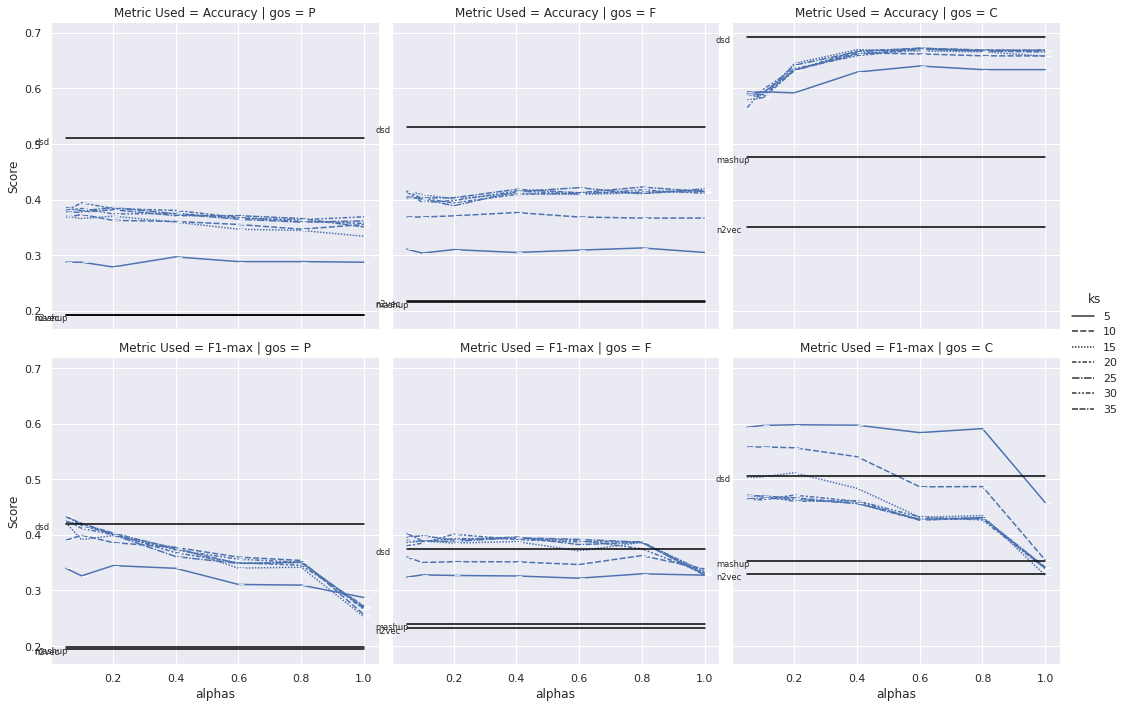

In [294]:
## SEEING THE VARIATION with VARIATION in "alphas"
p = sns.relplot(data = df_comp_bf, x= "alphas", y="Score", col="gos", row="Metric Used",
                style = "ks", kind = "line", marker = True)
for i, k in enumerate(["Accuracy", "F1-max"]):
    for j, g in enumerate(["P", "F", "C"]):
        n2vec  = df_mmap.loc[f"mouse_12000_biogrid-node2vec-{g}-{k}"]["best"]
        dsd    = df_mmap.loc[f"mouse_12000_biogrid-dsd-{g}-{k}"]["best"]
        mashup = df_mmap.loc[f"mouse_12000_biogrid-mashup-{g}-{k}"]["best"]
        print(n2vec * np.ones((len(falphas))))
        p.axes[i, j].plot(falphas, n2vec * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("n2vec", xy=(1,0.2), xytext=(-0.05,n2vec-0.01), fontsize = "x-small")
        p.axes[i, j].plot(falphas, dsd * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("dsd", xy=(1,0.2), xytext=(-0.05,dsd-0.01), fontsize = "x-small")
        p.axes[i, j].plot(falphas, mashup * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("mashup", xy=(1,0.2), xytext=(-0.05,mashup-0.01), fontsize = "x-small")
        
p.savefig("outputs/unimundo/bakers_yeast_biogrid-fission_yeast_biogrid/fission_vs_alpha.png")
#p.map(sns.lineplot, ci = None)
"""
for i, k in enumerate(ks):
    for j, g in enumerate(["P", "F", "C"]):
        dc = df_comp.loc[(df_comp["ks"] == k) & (df_comp["gos"] == g), :]
        dc_a = dc[dc["Metric Used"] == "Accuracy"]
        dc_f = dc[dc["Metric Used"] == "F1-max"]
        p.axes[i, j].fill_between(dc_a["alphas"], dc_a["Score"] - dc_a["std"], dc_a["Score"] + dc_a["std"], color = "blue", alpha=0.15)
        p.axes[i, j].fill_between(dc_f["alphas"], dc_f["Score"] - dc_f["std"], dc_f["Score"] + dc_f["std"], color = "orange", alpha=0.15)
p.savefig("outputs/unimundo_outputs/bakers_yeast_biogrid-fission_yeast_biogrid/alphas_x_axis.png")
"""


[0.1929677 0.1929677 0.1929677 0.1929677 0.1929677 0.1929677 0.1929677]
[0.21825293 0.21825293 0.21825293 0.21825293 0.21825293 0.21825293
 0.21825293]
[0.35069845 0.35069845 0.35069845 0.35069845 0.35069845 0.35069845
 0.35069845]
[0.19407207 0.19407207 0.19407207 0.19407207 0.19407207 0.19407207
 0.19407207]
[0.23227287 0.23227287 0.23227287 0.23227287 0.23227287 0.23227287
 0.23227287]
[0.32959253 0.32959253 0.32959253 0.32959253 0.32959253 0.32959253
 0.32959253]


'\nfor i, k in enumerate(ks):\n    for j, g in enumerate(["P", "F", "C"]):\n        dc = df_comp.loc[(df_comp["ks"] == k) & (df_comp["gos"] == g), :]\n        dc_a = dc[dc["Metric Used"] == "Accuracy"]\n        dc_f = dc[dc["Metric Used"] == "F1-max"]\n        p.axes[i, j].fill_between(dc_a["alphas"], dc_a["Score"] - dc_a["std"], dc_a["Score"] + dc_a["std"], color = "blue", alpha=0.15)\n        p.axes[i, j].fill_between(dc_f["alphas"], dc_f["Score"] - dc_f["std"], dc_f["Score"] + dc_f["std"], color = "orange", alpha=0.15)\np.savefig("outputs/unimundo_outputs/bakers_yeast_biogrid-fission_yeast_biogrid/alphas_x_axis.png")\n'

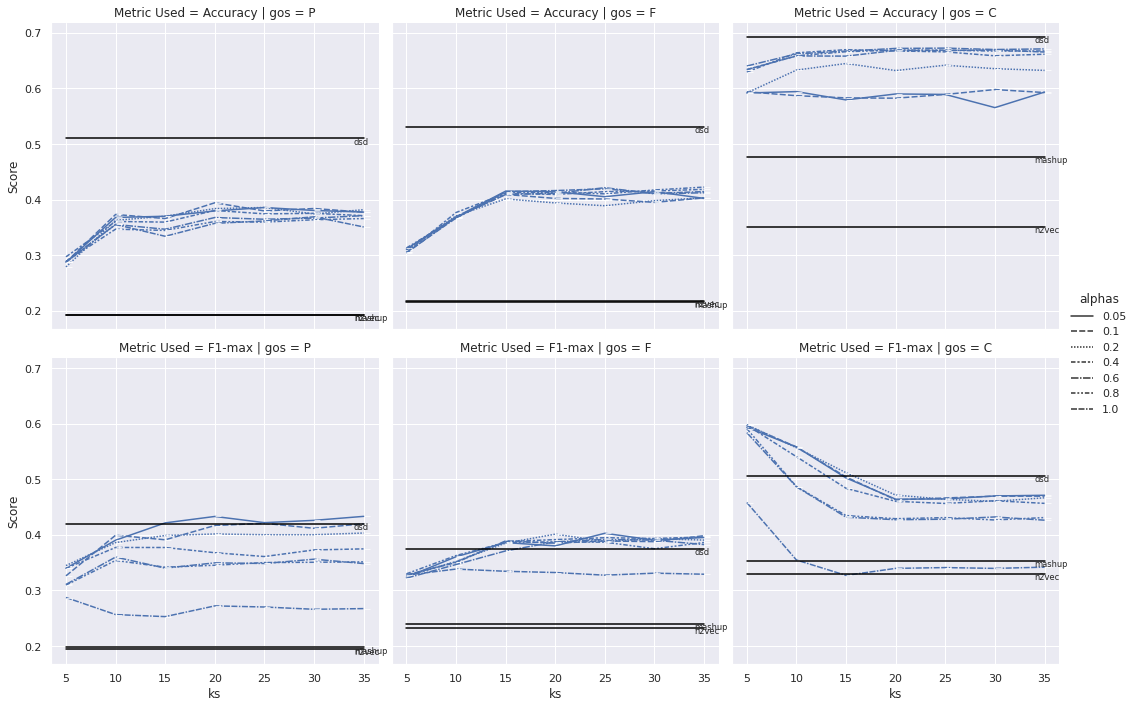

In [296]:
## SEEING THE VARIATION with VARIATION in "alphas"
p = sns.relplot(data = df_comp_bf, x= "ks", y="Score", col="gos", row="Metric Used",
                style = "alphas", kind = "line", marker = True)
for i, k in enumerate(["Accuracy", "F1-max"]):
    for j, g in enumerate(["P", "F", "C"]):
        n2vec  = df_mmap.loc[f"mouse_12000_biogrid-node2vec-{g}-{k}"]["best"]
        dsd    = df_mmap.loc[f"mouse_12000_biogrid-dsd-{g}-{k}"]["best"]
        mashup = df_mmap.loc[f"mouse_12000_biogrid-mashup-{g}-{k}"]["best"]
        print(n2vec * np.ones((len(falphas))))
        p.axes[i, j].plot(ks, n2vec * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("n2vec", xycoords = "data", xy=(5, n2vec), xytext=(34,n2vec-0.01), fontsize = "x-small")
        p.axes[i, j].plot(ks, dsd * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("dsd", xycoords = "data", xy=(5, dsd), xytext=(34,dsd-0.01), fontsize = "x-small")
        p.axes[i, j].plot(ks, mashup * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("mashup", xycoords = "data", xy=(5, mashup), xytext=(34,mashup-0.01), fontsize = "x-small")
        
p.savefig("outputs/unimundo/bakers_yeast_biogrid-fission_yeast_biogrid/fission_vs_ks.png")
#p.map(sns.lineplot, ci = None)
"""
for i, k in enumerate(ks):
    for j, g in enumerate(["P", "F", "C"]):
        dc = df_comp.loc[(df_comp["ks"] == k) & (df_comp["gos"] == g), :]
        dc_a = dc[dc["Metric Used"] == "Accuracy"]
        dc_f = dc[dc["Metric Used"] == "F1-max"]
        p.axes[i, j].fill_between(dc_a["alphas"], dc_a["Score"] - dc_a["std"], dc_a["Score"] + dc_a["std"], color = "blue", alpha=0.15)
        p.axes[i, j].fill_between(dc_f["alphas"], dc_f["Score"] - dc_f["std"], dc_f["Score"] + dc_f["std"], color = "orange", alpha=0.15)
p.savefig("outputs/unimundo_outputs/bakers_yeast_biogrid-fission_yeast_biogrid/alphas_x_axis.png")
"""